# Working with data structures

## Junior mentor:

Y. Fabian Bautista


EDDIT THIS NEW LINE

## Objectives of the tutorial

1. Create and manipulate data sets: Lists, arrays, dictionaries
2. Use Pandas package to manipulate data sets
3. Use h5py package for data set manipulation
4. Plot data structures using matplotlib
5. #### Use Loops and  conditional statements ?
6. #### Fit data, and computing goodness of fit ?

### Loading packages

In [1]:
import pandas as pf # For data structure manipulations
import matplotlib.pyplot as plt # For ploting

# Arrays

A numpy array is similar to a list. It's usually fixed in size and each element is of the same type. We can cast a list to a numpy array by first importing numpy: 

In [10]:
import numpy as np # For array and mathematical manipulations

## 1D Arrays

 We  cast a list as follows:


In [29]:
# Create a numpy array

a = np.array([0, 1, 2, 3, 4])
a

array([0, 1, 2, 3, 4])

Each element is of the same type, in this case integers: 


 As with lists, we can access each element via a square bracket:


In [35]:
# Print each element

print("a[0]:", a[0])
print("a[1]:", a[1])
print("a[2]:", a[2])
print("a[3]:", a[3])
print("a[4]:", a[4])

a[0]: 0
a[1]: 1
a[2]: 2
a[3]: 3
a[4]: 4


If we check the type of the array we get <b>numpy.ndarray</b>:


In [37]:
# Check the type of the array

type(a)

numpy.ndarray

As numpy arrays contain data of the same type, we can use the attribute "dtype" to obtain the Data-type of the array’s elements. In this case a 64-bit integer: 

In [38]:
# Check the type of the values stored in numpy array

a.dtype

dtype('int64')

We can create a numpy array with real numbers:


In [39]:
# Create a numpy array

b = np.array([3.1, 11.02, 6.2, 213.2, 5.2])

In [40]:
# Check the type of array

type(b)

numpy.ndarray

In [41]:
# Check the value type

b.dtype

dtype('float64')

### Slicing

Like lists, we can slice the numpy array, and we can select the elements from 1 to 3 and assign it to a new numpy array <code>d</code> as follows:

In [45]:
# Create numpy array

c = np.array([20, 1, 2, 3, 4])

# Slicing the numpy array

d = c[1:4]
d

array([1, 2, 3])

### Assign Value with List


Similarly, we can use a list to select a specific index.
The list ' select ' contains several values:

In [48]:
# Create the index list

select = [0, 2, 3]

We can use the list as an argument in the brackets. The output is the elements corresponding to the particular index:

In [49]:
# Use List to select elements

d = c[select]
d

array([20,  2,  3])

### Other Attributes

Let's review some basic array attributes using the array <code>a</code>:

In [51]:
# Create a numpy array

e = np.array([0, 1, 2, 3, 4])
e

array([0, 1, 2, 3, 4])

The attribute <code>size</code> is the number of elements in the array:

In [52]:
# Get the size of numpy array

e.size

5

The next two attributes will make more sense when we get to higher dimensions but let's review them. The attribute <code>ndim</code> represents the number of array dimensions or the rank of the array, in this case, one:

In [53]:
# Get the number of dimensions of numpy array

e.ndim

1

The attribute <code>shape</code> is a tuple of integers indicating the size of the array in each dimension:

In [54]:
# Get the shape/size of numpy array

a.shape

(5,)

### Mean of a 1D numpy array

In [56]:
# Get the mean of numpy array

mean = e.mean()
mean

2.0

### Get the standard deviation of 1D numpy array


In [58]:
# Get the standard deviation of numpy array

standard_deviation = e.std()
standard_deviation

1.4142135623730951

### Maximal and minimal values in a 1D array

In [59]:
# Get the biggest value in the numpy array

max_e = e.max()
max_e

4

In [60]:
# Get the smallest value in the numpy array

min_e = e.min()
min_e

0

# 2 -D numpy arrays

<h2 id="create">Create a 2D Numpy Array</h2>


Consider the list <code>a</code>, the list contains three nested lists **each of equal size**. 


In [185]:
# Create a list

a = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
a

[[11, 12, 13], [21, 22, 23], [31, 32, 33]]

We can cast the list to a Numpy Array as follow

In [187]:
# Convert list to Numpy Array
# Every element is the same type

A = np.array(a)
A

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

We can use the attribute <code>ndim</code> to obtain the number of axes or dimensions referred to as the rank. 

In [188]:
# Show the numpy array dimensions

A.ndim

2

Attribute <code>shape</code> returns a tuple corresponding to the size or number of each dimension.

In [190]:
# Show the numpy array shape

A.shape

(3, 3)

The total number of elements in the array is given by the attribute <code>size</code>.


In [192]:
# Show the numpy array size

A.size

9

<h2 id="access">Accessing different elements of a Numpy Array</h2>


We can use rectangular brackets to access the different elements of the array. The correspondence between the rectangular brackets and the list and the rectangular representation is shown in the following figure for a 3x3 array:  


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/NumTwoEg.png" width="500" />

We can access the 2nd-row 3rd column as shown in the following figure:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/NumTwoFT.png" width="400" />

 We simply use the square brackets and the indices corresponding to the element we would like:


In [196]:
# Access the element on the second row and third column

A[1, 2]

23

We can also use slicing in numpy arrays. Consider the following figure. We would like to obtain the first two columns in the first row

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/NumTwoFSF.png" width="400" />

This can be done with the following syntax 

In [202]:
# Access the element on the first row and first and second columns

A[0,0:2] #  or equivalent A[0][0:2]

array([11, 12])

### Excercise

Write the comand that selects the following elements of the array 
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/2D_numpy.png" width="550"><br />

## Numpy Array Operations

Recall <code> numpy </code> is a python lidrary for doing mathematics. In particular, we can do the usual mathematics for arrays. 

### Addition 

We can  add arrays. The process is identical to matrix addition. Matrix addition of <code>X</code> and <code>Y</code> is shown in the following figure:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/NumTwoAdd.png" width="500" />



Consuder for instance the numpy array given by <code>X</code> and <code>Y</code>


In [206]:
# Create a numpy array X

X = np.array([[1, 0], [0, 1]]) 
X

array([[1, 0],
       [0, 1]])

In [207]:
# Create a numpy array Y

Y = np.array([[2, 1], [1, 2]]) 
Y

array([[2, 1],
       [1, 2]])

In [208]:
# Add X and Y

Z = X + Y
Z

array([[3, 1],
       [1, 3]])

### Mutiplication by a scalar

Multiplying a numpy array by a scaler is identical to multiplying a matrix by a scaler. If we multiply the matrix <code>Y</code> by the scaler 2, we simply multiply every element in the matrix by 2 as shown in the figure.
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/NumTwoDb.png" width="500" />

In [209]:
2*Y

array([[4, 2],
       [2, 4]])

### Matrix multiplication

Recall that the multiplication of two rectangulat matrices X and Y, requires that the number of collums in X is equal to the number of rows in Y. That is, <code> sum( X[i,n] Y[n,j]) = W[i,j] </code>

In [211]:
W = np.dot(X,Y)
W

array([[2, 1],
       [1, 2]])

# Excercise

considet the lists <code> a = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]] </code> and <code > b = [0,3,5,6] </code>

1. Convert them to Numpy Arrays
2. Multiply the matrix a by the number 10
3. Compute the norm of the vector b
4. Comput the product of the matrix a and the vector b. What is the <code> shape </code>, <code> ndim </code> and <code> size </code> of the resulting matrix ?

We can also apply some numpy functions over matrices. For intance, we can compute the <code> sin </code> of matrix. It computes the sine of each elemen in the matrix

In [214]:
np.sin(W)

array([[0.90929743, 0.84147098],
       [0.84147098, 0.90929743]])

# Dictionaries

<h3 id="content">What are Dictionaries?</h3>
A dictionary consists of keys and values. It is helpful to compare a dictionary to a list. Instead of the numerical indexes such as a list, dictionaries have keys. These keys are the keys that are used to access values within a dictionary.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%202/images/DictsList.png" width="650" />


An example of a Dictionary <code>Dict</code>:


In [232]:
# Create the dictionary

Dict = {"key1": 1, "key2": "2", "key3": np.array([3, 3, 3]), "key4": (4, 4, '4'), ('key5'): 5, (0, 1): 6}
Dict

{'key1': 1,
 'key2': '2',
 'key3': array([3, 3, 3]),
 'key4': (4, 4, '4'),
 'key5': 5,
 (0, 1): 6}

Notice for the keys we can use immutable objects such as <code>strings </code> or <code>tuples </code>.

In [224]:
# Access to the value by the key

Dict["key1"]

1

In [225]:
Dict[(0, 1)]

6

the type of a dictionary is <code> dict </code>

In [226]:
type(Dict)

dict

We can ask for the list of keys in the dictionary using the atribute <code> .keys()</code>. This is pecially important we using datafiles whose content we know nothing about

In [227]:
Dict.keys()

dict_keys(['key1', 'key2', 'key3', 'key4', 'key5', (0, 1)])

Notice that the elements for each keys do not have to be of the same type. 

In [229]:
Dict['key3']

array([3, 3, 3])

In the case that the data values are given by arrays, we can use the atribute <code> .dtype </code>,  to  know the type of data contained in a key argument. 
 

In [234]:
Dict['key3'].dtype

dtype('int64')

# The Pandas library

In this section we use Pandas library for data visualization of <code> .csv </code> files. Pandas is a very big lybrary useful for doung data analysis. Check <a href="https://pandas.pydata.org/pandas-docs/stable/index.html"> pandas </a>  for more information. We will use the method <code> pandas.DataFrame </code> . See
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html"> pandas.DataFrame </a> for information on DataFrames

For a longer beginers introduction to pandas, watch the following  <a href='https://www.youtube.com/watch?v=UB3DE5Bgfx4'> lecture </a>

### What are <code> .csv </code> files?

 A Comma Separated Values  (<code> .csv </code>) file, is a plain text file that contains a list of data, separated by commas.  Let us show an DM example on how to load and manipulate a <code> .csv </code> file. 

### The  <a http=https://www.kaggle.com/c/mdm/overview/description> Mapping Dark Matter </a>  challenge
The Mapping Dark Matter was a image analysis competition whose aim is to encourage the development of new algorithms that can be applied to challenge of measuring the tiny distortions in galaxy images caused by dark matter. The aim is to measure the shapes of galaxies to reconstruct the gravitational lensing signal in the presence of noise and a known Point Spread Function. The signal is a very small change in the galaxies’ ellipticity.The challenge is to measure the ellipticity of 100,000 simulated galaxies.

The numbers "e1" and "e2" are defined in terms of the ratio of the major to minor axis of the object and the angle of the object:

where

e1 = [ (a-b)/(a+b) ] cos(2theta)

e2 = [ (a-b)/(a+b) ] sin(2theta)

In the following, we explore the <code> csv </code> file that compiles the values for e1 and e2 for a group of  60000 galaxies, from the Mapping Dark Matter challenge.

In [2]:
import pandas as pd

To read the <code> .csv </code> file we use the method <code > pandas.ead_csv </code>

In [22]:
csv_path = 'mdm_solution_after_rescore.csv'
df = pd.read_csv(csv_path)

It creates a <code > DataFrame </code> which is a Two-dimensional, size-mutable, potentially heterogeneous tabulat data. It consist of the following elements: <code> DataFrame(data, index = , columns = )</code>. Columns corresponds to the headers of the Data file. 

In [28]:
df

,GalaxyID,e1,e2
0,1,0.155845,-0.061419
1,2,-0.020863,-0.186812
2,3,0.187274,0.058593
3,4,-0.021505,-0.092233
4,5,0.250380,0.258280
...,...,...,...
59995,59996,-0.076641,-0.334038
59996,59997,0.272784,0.075340
59997,59998,0.072384,0.159890
59998,59999,-0.219463,-0.266648


 To acces the headers name we use the methof <code> columns </code>

In [62]:
df.columns

Index(['GalaxyID', 'e1', 'e2'], dtype='object')

we can also acces the data type using the methof <code> dtypes </code>

In [64]:
df.dtypes

GalaxyID      int64
e1          float64
e2          float64
dtype: object

the method <code> head() </code> allows us to see only the first 5 elements of the data frame

In [35]:
df.head()

,GalaxyID,e1,e2
0,1,0.155845,-0.061419
1,2,-0.020863,-0.186812
2,3,0.187274,0.058593
3,4,-0.021505,-0.092233
4,5,0.250380,0.258280


we can also ask for the last 5 elements using the method <code> tail()</code>

In [92]:
df.tail(10)

,GalaxyID,e1,e2
59990,59991,-0.182750,0.123184
59991,59992,0.275780,-0.139376
59992,59993,-0.259328,0.203458
59993,59994,0.263952,0.062747
59994,59995,-0.286739,-0.384124
59995,59996,-0.076641,-0.334038
59996,59997,0.272784,0.075340
59997,59998,0.072384,0.159890
59998,59999,-0.219463,-0.266648
59999,60000,-0.152461,-0.035914


Likewise for Arrays, we can acces a desired element of the Data frame as follows 

In [52]:
#for accessing ith row:
print(df.iloc[0])

#for accessing column named X
df.GalaxyID


GalaxyID    1.000000
e1          0.155845
e2         -0.061419
Name: 0, dtype: float64


0            1
1            2
2            3
3            4
4            5
         ...  
59995    59996
59996    59997
59997    59998
59998    59999
59999    60000
Name: GalaxyID, Length: 60000, dtype: int64

In [53]:
#for accessing ith row and column named X
df.iloc[0].GalaxyID

1.0

We can also slice the DataFrame

In [56]:
df[10:16]

,GalaxyID,e1,e2
10,11,-0.048268,0.254247
11,12,0.108448,-0.071465
12,13,0.256315,0.030327
13,14,0.049122,0.086961
14,15,-0.038477,-0.051579
15,16,0.079760,-0.235458


### Ploting 

For ploting we can use the method <code> .plot() </code> 
(See <a href="https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.DataFrame.plot.html"> pandas.DataFrame.plot  </a>  for more  )
    

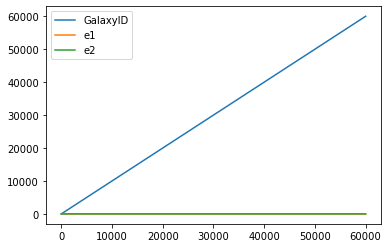

In [58]:
# TO plot all of the columns of the DataFrame 
df.plot()

We can also plot a decired slice

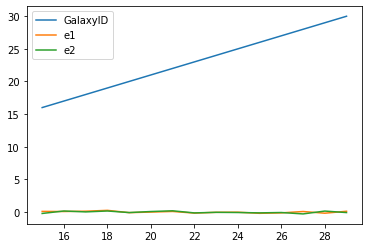

In [59]:
df[15:30].plot()

We can also plot individual data columns 

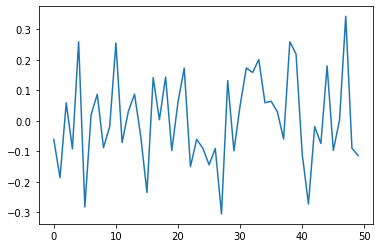

In [88]:
df['e2'][0:50].plot()

# Excercise

Do a plot for the ellipticity e1 for the last 100 gallaxies in the csv file 

We can also do plots for column 1 vs column 2, for example

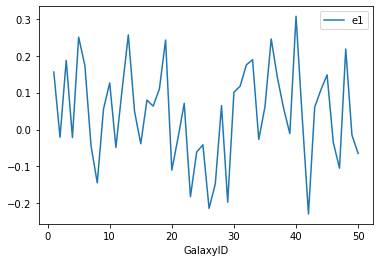

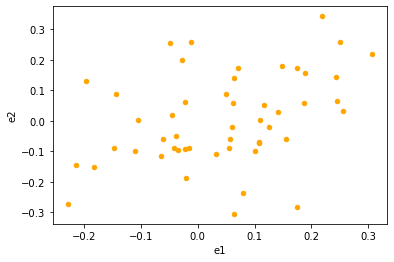

In [89]:
df[0:50].plot('GalaxyID','e1')
df[0:50].plot.scatter('e1','e2',c='Orange')

#  h5py Data sets 

### For more information see  <a href="https://docs.h5py.org/en/stable/quick.html"> h5py </a>

An HDF5 file is a container for two kinds of objects: <code> datasets </code>, which are array-like collections of data, and <code> groups, </code> which are folder-like containers that hold datasets and other groups. The most fundamental thing to remember when using h5py is:

#### Groups work like dictionaries, and datasets work like NumPy arrays


In this part of the tutorial we will explore several features when working with h5py datasets. We will show that by working with an especific example:

## Example of h5py Data sets 

The Auriga simulations  provided us with the  data file <code>  'halo_1_DMO.hdf5' </code> which contains   a set of  dark matter particles placed between 4-15 kpc in a dark matter-only halo. In the data set,  we have acces to  the particle <code> 'Coordinates' (x, y, z in kpc) </code> , the particles  <code> 'Mass' (in Solar masses) </code>, and  <code> 'Velocities' (vx, vy, vz in km/s) </code> .

In [2]:
import h5py 

### Loading data sets

In [3]:
file_path = 'halo_1_DMO.hdf5'

In [4]:
halo1 = h5py.File(file_path, 'r') #'r' atribute to read only

In [108]:
# with h5py.File(file_path,'r') as halo_1:
    
#     data_halo_1 = halo_1['DarkMatter']
    
#     print(data_halo_1.keys())
    


As in a dictionary, we can as for the set of keys contained in the file

In [5]:
halo1.keys()

<KeysViewHDF5 ['DarkMatter']>

Let us create a new data set, which contains all the information contained in the group <code> 'DarkMatter' </code>

In [7]:
data_set = halo1['DarkMatter']
data_set

<HDF5 group "/DarkMatter" (3 members)>

As we have mentioned, groups contain both data sets, or other subgroups. To see what data sets  and subgoups are inlcuded, we use the <code> keys() </code> atribute of the group (recall groups work as normal dictionaries)

In [111]:
data_set.keys()

<KeysViewHDF5 ['Coordinates', 'Mass', 'Velocities']>

Let us create a dataset wich contains only the coordinates of the DM particles

In [8]:
particle_codts = data_set['Coordinates']
particle_codts

<HDF5 dataset "Coordinates": shape (244986, 3), type "<f4">

 We can for instance create  1-D arrays that contains the particles x, y or z coordinates only. Since there are <code> 244986 </code> particles, we choose to work with a subset of them, for instance the first <code> 1000 </code> particles

In [16]:
x_c = np.array([particle_codts[i][0] for i in range(1000 )])
y_c = np.array([particle_codts[i][1] for i in range(1000 )])

In [183]:
#x_c

It is convenient to visualize data in plots. For instance, we can create ask for the positions on the <code> x-y </code> plane. 

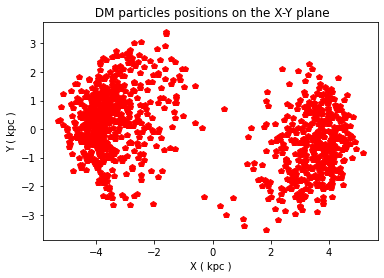

In [17]:
plt.plot(x_c,y_c, 'rp') #change 'cf' = color shape, for instance bs = blue squares, ro=red balls
plt.xlabel('X ( kpc )')
plt.ylabel('Y ( kpc )')
plt.title(' DM particles positions on the X-Y plane')
plt.show()

# Excercise

This excercice has two parts:
1. Do a plot for the particles positions on the  X-Z, and Y-Z, for  the last 800 particles in the data set.
2. Do a plot of the particles velocities in the Vx-Vy plane, recall the key for the particles velocities is <code> 'Velocities' </code>

## 3-D plots

More on 3D plotting
 <a href='https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html'> 3-D_plotting </a> 


Let us finally use mathplot library to do 3 dimensional plots

In [136]:
from mpl_toolkits.mplot3d import axes3d


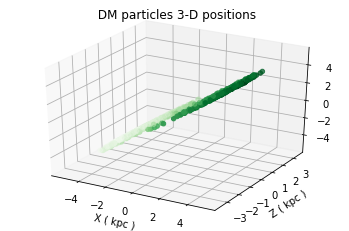

In [181]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
x_pt = np.array([particle_codts[i][0] for i in range(1000)])
y_pt = np.array([particle_codts[i][1] for i in range(1000)])
z_pt = np.array([particle_codts[i][0] for i in range(1000)])
plt.title(' DM particles 3-D positions')
plt.xlabel('X ( kpc )')
plt.ylabel('Y ( kpc )')
plt.ylabel('Z ( kpc )')
ax.scatter3D(x_pt, y_pt, z_pt, c = z_pt, cmap='Greens')


The contours are not too important, they just show that particles are at positive (dark) degative (light) positions

Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

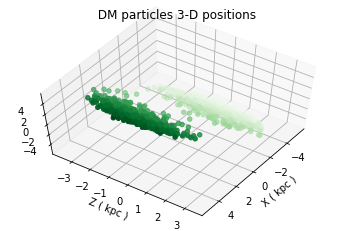

In [182]:
ax.view_init(60, 35)
fig

# Excercise
Do a 3 dimensional plot for the particles linear momentum. Recall the linear momentum for each particle is defined as <code> p = m v </code>. Hint, the particles mass can be acces from the data set using the key  <code> 'Mass' </code>

# Loops and Conditional statements 